# Promoter footprints

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
from os.path import exists
import seaborn as sns
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import spearmanr

import copy

sns.set()

from sklearn.decomposition import FastICA

In [171]:
color_dict={
    "act":"#BFD598",
    "dual":"#F3DAA9",
    "rep":"#E8B19D",
    "pol":"#A9BFE3"
   }

In [172]:
# Custom analysis
df_new_LB_DNA = pd.read_csv(
    "../../../data/LB_heatshock_bc_by_gc/LB_DNA_113_identified.txt", 
    delim_whitespace=True, 
    names=["ct", "tag", "seq", "mapping_count", "name", "nmut"]
)

df_new_LB_RNA = pd.read_csv(
    "../../../data/LB_heatshock_bc_by_gc/LB_RNA_113_identified.txt", 
    delim_whitespace=True, 
    names=["ct", "tag", "seq", "mapping_count", "name", "nmut"]
)

df_new_LB = df_new_LB_DNA.merge(df_new_LB_RNA, on=['tag', 'seq', 'mapping_count', 'name', 'nmut'], how='outer', suffixes=('_0', '_1'))
df_new_LB.fillna(0, inplace=True)
df_new_LB = df_new_LB.loc[df_new_LB['ct_0'] < 1000, :]
df_new_LB = df_new_LB.loc[df_new_LB['ct_1'] < 1000, :]
df_new_LB = df_new_LB.loc[df_new_LB['nmut'] < 30, :]
df_new_LB = df_new_LB.loc[df_new_LB['mapping_count'] > 1, :]
df_new_LB = df_new_LB.loc[df_new_LB["name"] == "rspA", :]
df_new_LB.reset_index(inplace=True, drop=True)

# Fix type
df_new_LB["ct_1"] = [int(x) for x in df_new_LB.ct_1]
df_new_LB["ct_0"] = [int(x) for x in df_new_LB.ct_0]
df_new_LB["ct"] = df_new_LB.ct_1 + df_new_LB.ct_0

In [210]:
df_LB = pd.read_csv("../../../data/LB_barcodes.csv")
df_LB_tom = df_LB_tom.loc[df_LB_tom.name == "rspAp", :]
df_LB_tom.rename(columns={"promoter": "seq"}, inplace=True)

df_LB_tom = df_LB_tom.loc[df_LB_tom.counts < 1000, :]
df_LB_tom = df_LB_tom.loc[df_LB_tom.ct_1/df_LB_tom.ct > 0.05, :]

df_LB_tom

,ct,ct_0,barcode,ct_1,name,counts,seq
460094,15839,989,GTCTTTTGGTGTAAGGAAGT,14850,rspAp,511,TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTT...
460101,495,405,ACGATGTAAGTACGGCTAGA,90,rspAp,488,CTTCATCATTGGTCAACCATTCACAGCGAAAATATACGTCTCTTTC...
460102,50,47,CGGGCGTTCGGTTACGCCAC,3,rspAp,478,ATTCATCTTTTGTCAACCATGCACACCGCAAATATACGCCTTCTTT...
460105,6923,1430,ATAAGTAAGAAGAATCTATA,5493,rspAp,455,TTTCATCTTTTGTCAACCATTCACAGCGCAAATAGACGCCTTTTTT...
460120,14195,2579,GGGACGTTATCGAATATCAC,11616,rspAp,391,TTTCATCTTTCGTCAACCAGCCACAGCGCAAAAATACGCCTTTTTT...
...,...,...,...,...,...,...,...
463423,2855,2595,TAGGGCTAAGCAGGTCACAG,260,rspAp,3,ATTCATCTTTTGTCAACCATTCGCAGCGCAAATATAGGGGTTTCTT...
463425,2855,2595,TAGGGCTAAGCAGGTCACAG,260,rspAp,3,ATTCATCTTTTGTCAACCATTCGCAGCGCAAATATAGGGGTTTCTT...
463431,30411,14295,CGACCGCTTCGTGGTGATTA,16116,rspAp,3,ATTCCTCTCTTGTCAACCATTCACGGCGCATATGTACGCCTTCTTT...
463432,1948,167,CAAGCGCATCAAAAACCGGA,1781,rspAp,3,ATGCACCTTTTGTCAAGCATTCACAGCGCAAATATACGCCTTTTTT...


In [231]:
df_LB_con_p = pd.read_csv("../../../data/P88_barcodes.csv")
df_LB_con_p = df_LB_con_p.loc[df_LB_con_p.name == "rspAp", :]
df_LB_con_p.rename(columns={"promoter": "seq"}, inplace=True)

df_LB_con_p = df_LB_con_p.loc[df_LB_con_p.ct < 10000, :]
df_LB_con_p = df_LB_con_p.loc[df_LB_con_p['count'] > 1, :]
df_LB_con_p = df_LB_con_p.loc[df_LB_con_p.ct_1/df_LB_con_p.ct > 0.01, :]

df_LB_con_p

,ct,ct_0,barcode,ct_1,seq,count,name
24,1143,72,GCAGTGCAGACCGAAACTGC,1071,TTTCATCTATTGGCAAGCATTCACAGCCCAAATATACGCCTTTTTT...,23,rspAp
28,66,65,GACGAGTCAATTTCTTCACA,1,TTTCATCTTTTGCCTACTATTCCCAGCGCAAATATACGCCTTATTT...,12,rspAp
36,614,49,AGGGTGAGTGCACCCGCGCA,565,GTTCAGCTGTTGTCAACCATTCACAGCGCCAATATGCCCCTTTTTT...,15,rspAp
46,752,44,CAAGCAAGTCGGTAGATCTA,708,TTTCATCTGTTGTCAGCCATTCACAGCGCAAGCTTACGCCTATTTT...,7,rspAp
49,96,39,TGGACAGCTCCAGACTGTGC,57,GTTCAGCTGTTGTCAACCATTCACAGCGCCAATATGCCCCTTTTTT...,2,rspAp
...,...,...,...,...,...,...,...
1517484,346,0,GGTTATTGCTGGCTAGAGAG,346,GTACATCTTTTGTCAACCATTCACAGCGCACATATACGCCTTTTTT...,2,rspAp
1517517,316,0,GGATGGTGATTCCGCCTTAT,316,TTCCATCTCTTGTCAATCATTCACAGCGCAAGTATACGCCGTTTTT...,3,rspAp
1517548,275,0,GCTCTGATCCGTCATTTCAT,275,TTTCAGCTTTTGTACACCATTCGCAGCGCTAATATGCACCTTGTTT...,4,rspAp
1517567,44,0,GATTCCTTATCGGTTCGGAC,44,TTTCATCACTTGACAACCCTTCTCAGCGCAAATATACGCCTTTTTT...,2,rspAp


In [229]:
df_LB_con_g = pd.read_csv("../../../data/G88_barcodes.csv")
df_LB_con_g = df_LB_con_g.loc[df_LB_con_g.name == "rspAp", :]
df_LB_con_g.rename(columns={"promoter": "seq"}, inplace=True)

df_LB_con_g = df_LB_con_g.loc[df_LB_con_g.ct < 10000, :]
df_LB_con_g = df_LB_con_g.loc[df_LB_con_g['count'] > 1, :]
df_LB_con_g = df_LB_con_g.loc[df_LB_con_g.ct_1/df_LB_con_g.ct > 0.01, :]

df_LB_con_g

,ct,ct_0,barcode,ct_1,seq,count,name
243,559,1,AAAAAATCATGGTATAGTAC,558,TTTCAGTTTTTGTCAACCATTCACATCGCAAATATACGCCTTTTTT...,15,rspAp
396,3,2,TCGTCGTCTGGGATAGGGGA,1,TGTCATGTTTTGTCCTCCATTCAAAGAGCAAATAGACGCCTTTTTT...,14,rspAp
463,2,1,CAATGAGTATCATTCTAATG,1,CCTGATGTTTTGTCAACCATTCACAGCGCAAATATGCGCCTTTGTT...,11,rspAp
980,3,2,CAAGCAAGTCGGTAGATCTA,1,TTTCATCTGTTGTCAGCCATTCACAGCGCAAGCTTACGCCTATTTT...,7,rspAp
1980,847,19,GGAGTACGCATGCGTGTTGC,828,TTTCATCCTTTGTCCACCCTTTACAGCGCAAATATACGCCTTTTTG...,5,rspAp
...,...,...,...,...,...,...,...
24812,6587,5458,GCCAGTCCGGACTCACACCC,1129,CATCATCTTTTGTCAACGACTCACAGCGCAAATATACCCCTTTTTT...,2,rspAp
24935,1514,862,TTGAGTATTTTGGGGACCAG,652,ATTCCCCTTTTTTCAACCATTCACAGCGCAAATATCAGCCTTTTTT...,2,rspAp
25037,1148,381,GATGTAGCATGTTGAAAGCA,767,ATGCACCTTTTGTCAAGCATTCACAGCGCAAATATACGCCTTTTTT...,2,rspAp
26525,602,15,GAGAATCCGGCGTAAGAAAA,587,AATCATCTTTTGTCAACCATTCACAGCGAAAATATACGCCTTTTTT...,2,rspAp


## Expression Shift

In [211]:
def expression_shift(_df, d=1):
    """
    Plot promoter footprint and add annotations for annotated sites.
    """

    # Create copy
    df = copy.deepcopy(_df)
    # Add pseudo count for DNA
    df.ct_0 += 1
    # Compute relative and total counts
    df["relative_counts"] = df.ct_1 / df.ct_0
    df["total_counts"] = df.ct_1 + df.ct_0

    # transform sequences to integers
    DNA_dict = {"A":0, "C":1, "G":2, "T":3}
    def make_int(x):
        return np.array([DNA_dict[y] for y in x])

    df['int_promoter'] = df['seq'].apply(make_int)

    # compute nucleotide frequencies
    freq_mat = np.zeros([2, 4, 160])
    for gDNA_counts, cDNA_counts, prom in zip(df['ct_0'], df['ct_1'], df['int_promoter']):
        freq_mat[0, prom, np.arange(160)] += gDNA_counts
        freq_mat[1, prom, np.arange(160)] += cDNA_counts

    freq_mat /= np.sum(df.total_counts)

    # find wild type sequence 
    wt_seq = np.argmax(np.sum(freq_mat, axis=0), axis=0)

    def is_mut(x):
        return ~np.equal(x, wt_seq)

    df['is_mutated'] = df['int_promoter'].apply(is_mut)

    mean_rel_counts = np.mean(df["relative_counts"])
    tot_counts = np.sum(df["total_counts"])

    ex_shift_arr = np.zeros(160)
    for x, seq in zip(df['relative_counts'], df['is_mutated']):
        ex_shift_arr[seq] += (x - mean_rel_counts) / mean_rel_counts
    ex_shift_arr = ex_shift_arr / len(df['relative_counts'])
    # make plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=True)


    # compute rolling average for expression shift
    ex_shift_av = [np.sum(ex_shift_arr[i-d:i+d]) / (2 * d + 1) for i in range(d, 160-d)]
    ex_shift_colors = [color_dict["rep"] if x > 0 else color_dict["act"] for x in ex_shift_av]

    # plot expression shift
    ax.bar(np.arange(160 - 2 * d) - (115-d), ex_shift_av, color=ex_shift_colors)
    ax.set_ylabel("Expression Shift\n[fold change]")
    ax.set_xlabel("Position relative to TSS")
    #ax.set_title(promoter + " in " + gc) 

    plt.subplots_adjust(wspace=0, hspace=0)

    plt.tight_layout()     
    return 

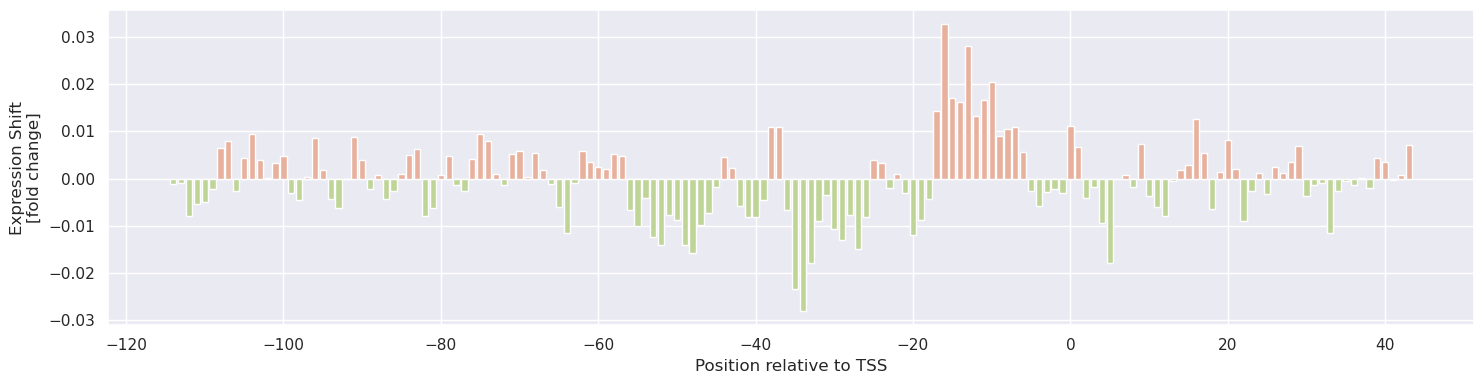

In [232]:
expression_shift(df_new_LB, d=1)

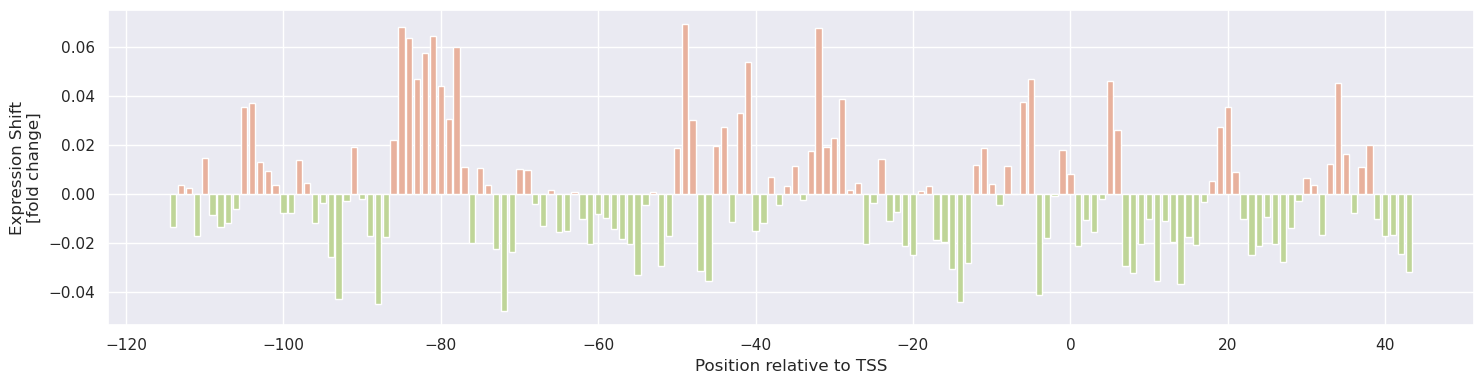

In [233]:
expression_shift(df_LB_tom, d=1)

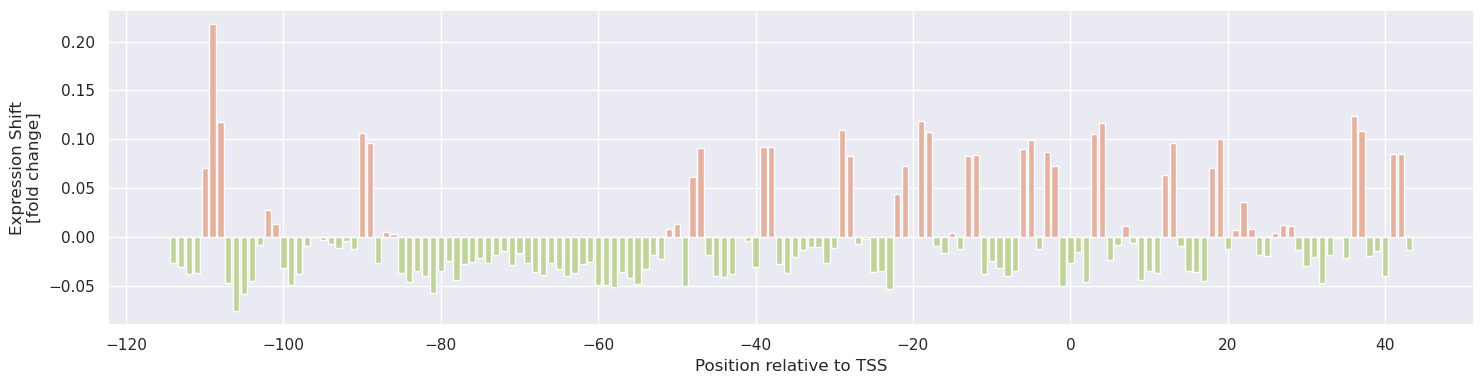

In [234]:
expression_shift(df_LB_con_g, d=1)

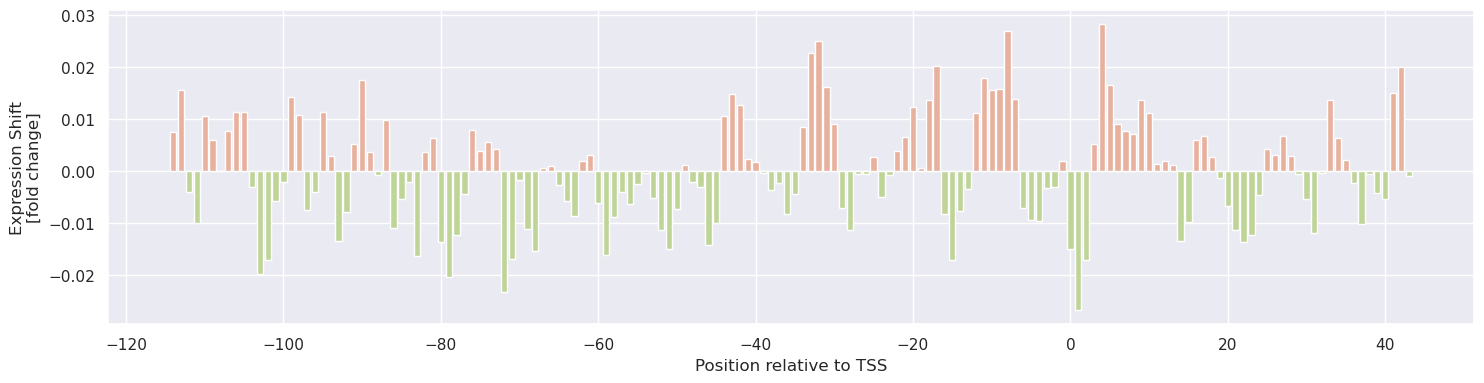

In [235]:
expression_shift(df_LB_con_p, d=1)

# Frequency matrices

In [214]:
def freq_mat(_df, d=1):
    
    
    # Create copy
    df = copy.deepcopy(_df)
    # Add pseudo count for DNA
    # Compute relative and total counts
    df["relative_counts"] = df.ct_1 / df.ct_0
    df["total_counts"] = df.ct_1 + df.ct_0

    # transform sequences to integers
    DNA_dict = {"A":0, "C":1, "G":2, "T":3}
    def make_int(x):
        return np.array([DNA_dict[y] for y in x])

    df['int_promoter'] = df['seq'].apply(make_int)
    # compute nucleotide frequencies
    freq_mat = np.zeros([2, 4, 160])
    tot_gDNA = np.sum(df['ct_0'])
    tot_cDNA = np.sum(df['ct_1'])
    for gDNA_counts, cDNA_counts, prom in zip(df['ct_0'], df['ct_1'], df['int_promoter']):
        freq_mat[0, prom, np.arange(160)] += gDNA_counts / tot_gDNA
        freq_mat[1, prom, np.arange(160)] += cDNA_counts / tot_cDNA
    
    # find wild type sequence 
    wt_seq = np.argmax(np.sum(freq_mat, axis=0), axis=0)
    
    freq_diffs = (freq_mat[0, :, :] - freq_mat[1, :, :])
    
    fig, ax = plt.subplots(3, 1, figsize=(15,8))
    
    ax[0].set_title("Differences at each position in frequencies.")
    ax[0].set_yticks([0, 1, 2, 3], ["A", "C", "G", "T"])
    ax[0].set_xticks([])
    ax[1].set_title("Differences at each position in frequencies.")
    ax[2].set_title("Differences in occurence of wild type letter between RNA and DNA.")
    ax[2].set_xlabel("Position")
    
    z1_plot = ax[0].imshow(
        freq_diffs, 
        aspect="auto", 
        cmap="bwr", 
        vmin=-np.max(np.abs(freq_diffs)), 
        vmax=np.max(np.abs(freq_diffs))
    )
    
    ax[0].grid(False)
    divider = make_axes_locatable(ax[0])

    ax_cb = divider.append_axes("right", size="2%", pad=0.05)
    fig_ = ax[0].get_figure()
    fig_.add_axes(ax_cb)

    plt.colorbar(z1_plot, cax=ax_cb)
    y = np.sum(np.abs(freq_diffs), axis=0)
    ax[1].bar(np.arange(d, 160-d) - 115, [np.sum(y[i-d:i+d+1]) / (2 * d + 1) for i in range(d, 160-d)])
    diff_av = [np.sum(freq_diffs[wt_seq, np.arange(160)][i-d:i+d+1]) / (2 * d + 1) for i in range(d, 160-d)]
    ax[2].bar(np.arange(d, 160-d) - 115, diff_av)
    
    plt.tight_layout()
    return 

/tmp/ipykernel_7386/973547481.py:54: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(z1_plot, cax=ax_cb)


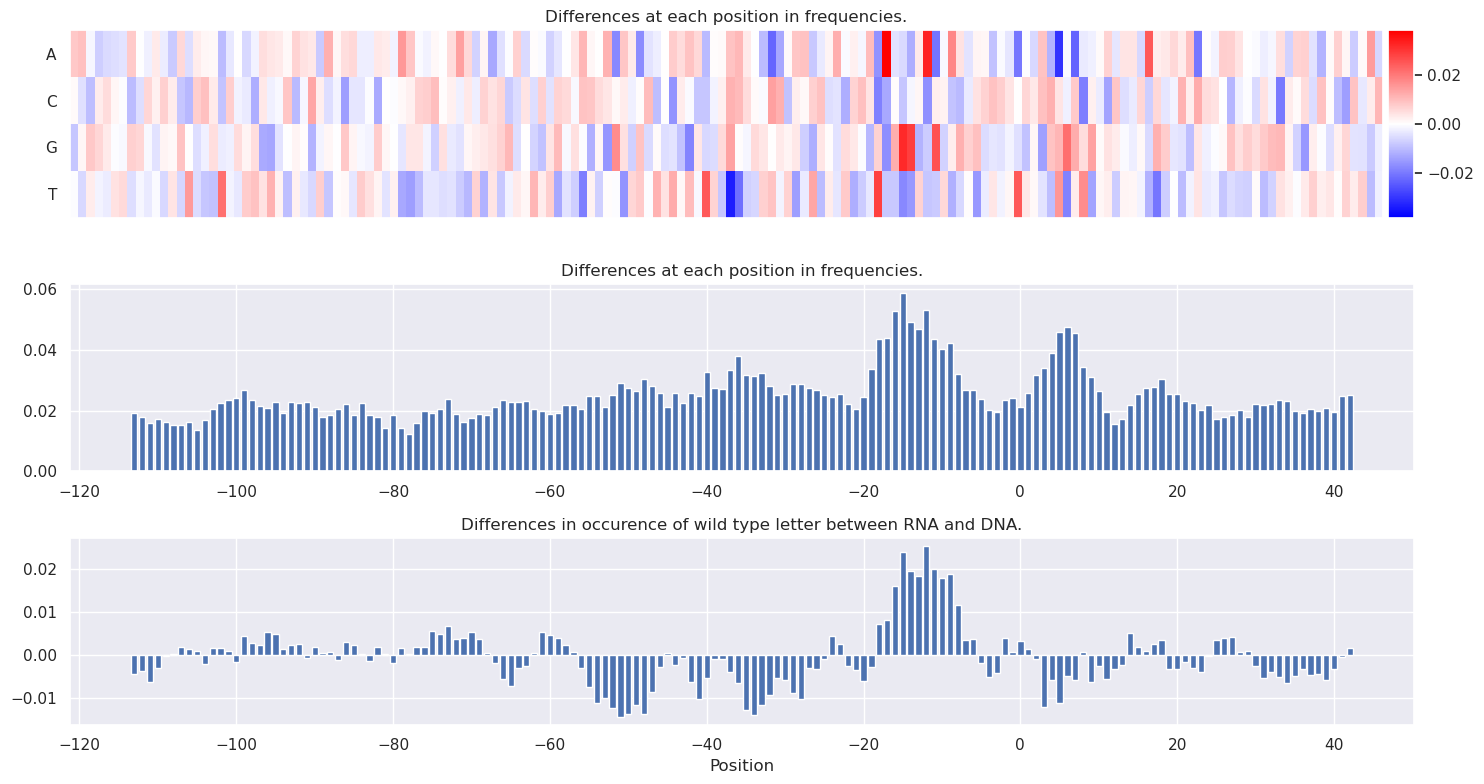

In [215]:
freq_mat(df_new_LB, d=2)

/tmp/ipykernel_7386/973547481.py:54: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(z1_plot, cax=ax_cb)


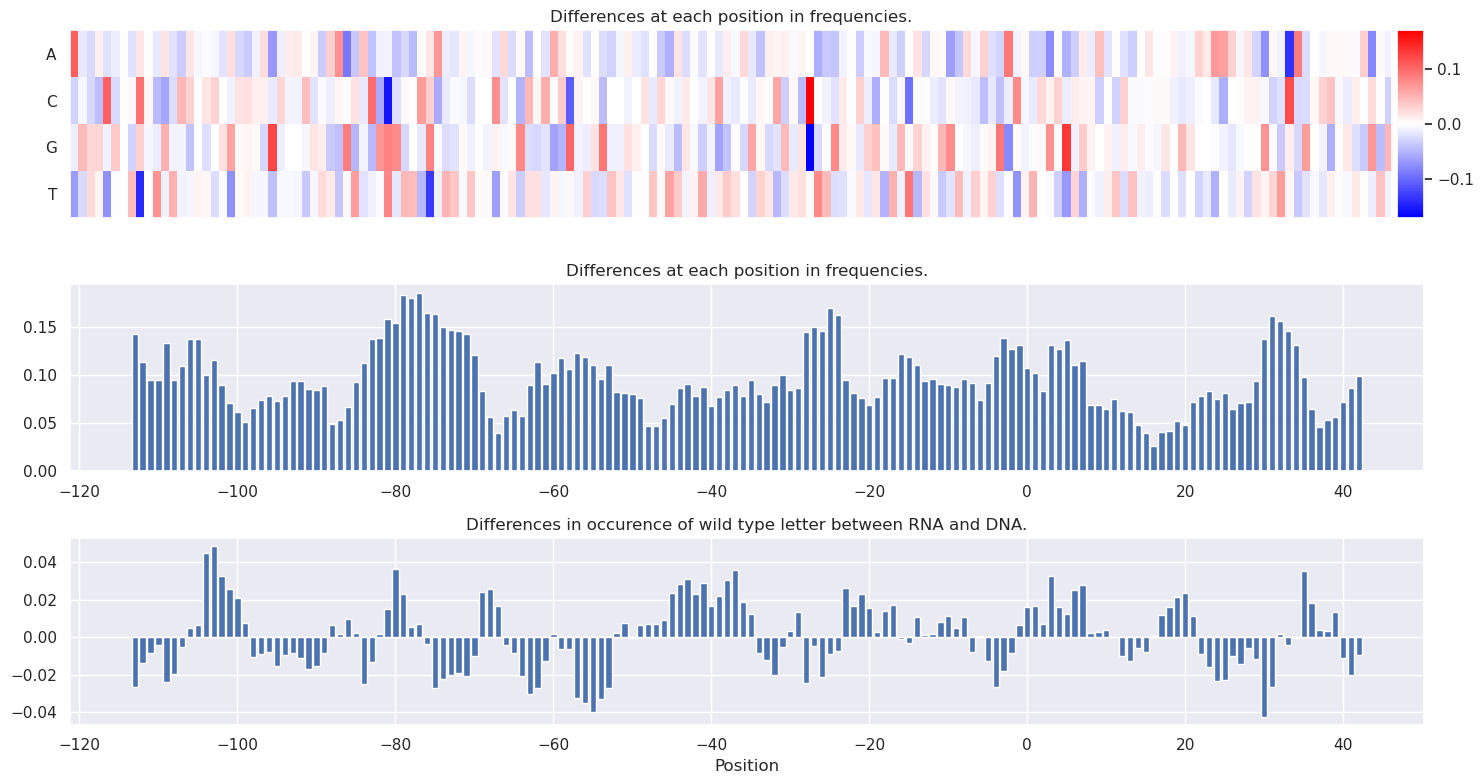

In [236]:
freq_mat(df_LB_tom, d=2)

/tmp/ipykernel_7386/973547481.py:54: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(z1_plot, cax=ax_cb)


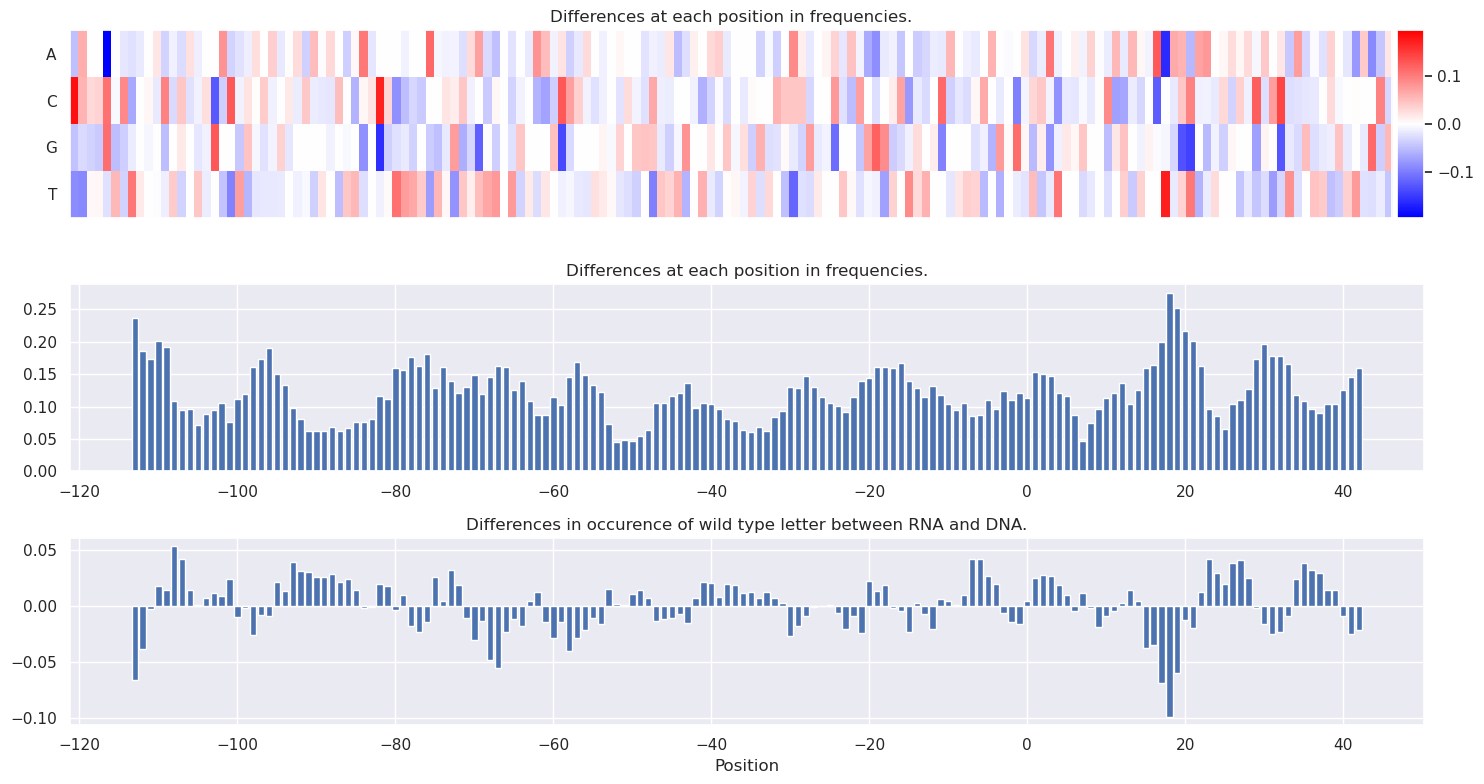

In [238]:
freq_mat(df_LB_con_g, d=2)

/tmp/ipykernel_7386/973547481.py:54: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(z1_plot, cax=ax_cb)


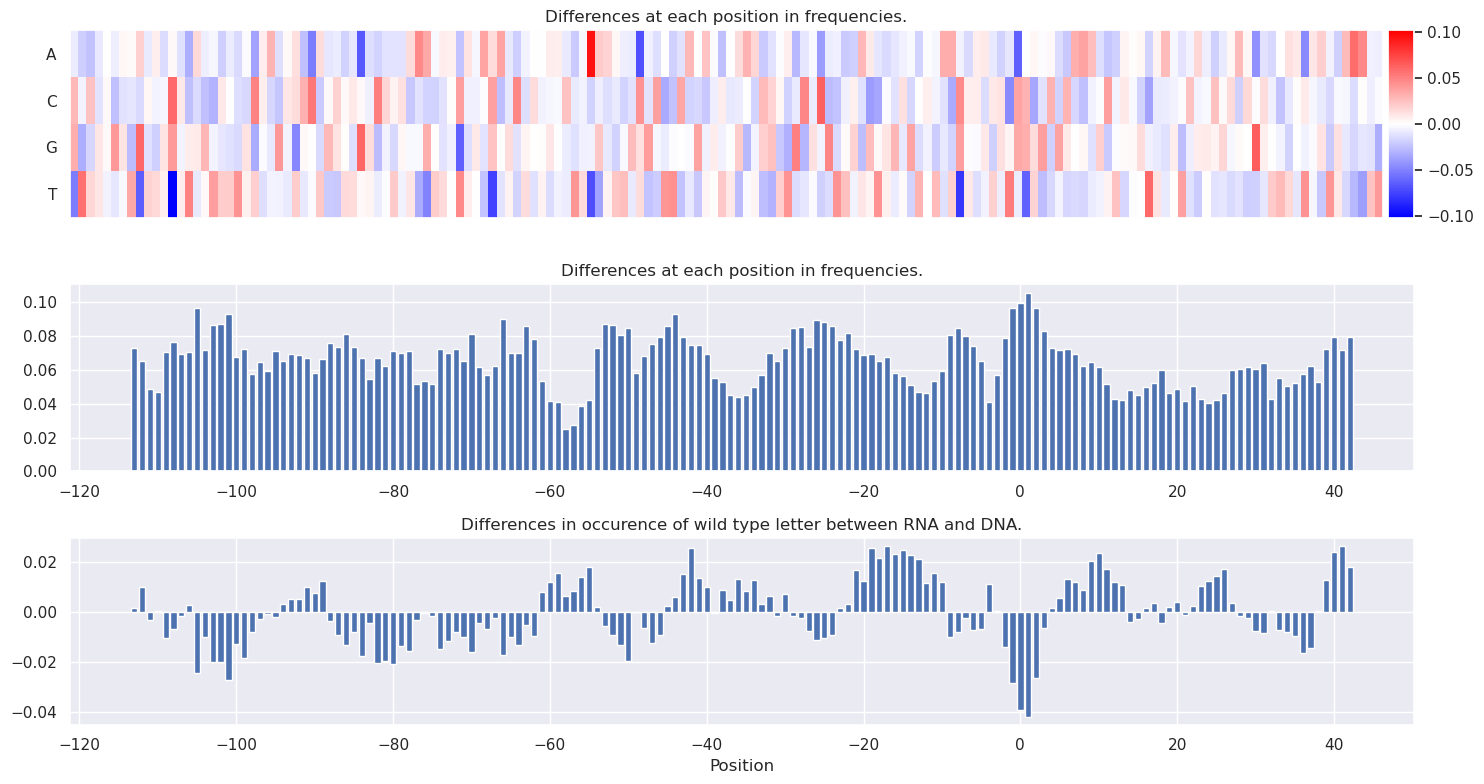

In [237]:
freq_mat(df_LB_con_p, d=2)

## Mutual information and Linear Regression

In [257]:
def mut_information(p):
    """
    Compute mutial information from joint probability distribution p(m, mu).
    """
    l = np.size(p, 2)
    I = np.zeros(l)
    for i in range(l):
        p_mu = np.sum(p[:, :, i], axis=0)
        p_m = np.sum(p[:, :, i], axis=1)
        I[i] = np.sum([p[m, mu, i] * np.log2(p[m, mu, i] / p_m[m] / p_mu[mu]) for mu in [0, 1] for m in [0, 1]])

    return I

    

def make_footprints(_df, d_lin=2, d_MI=2):
    """
    Plot promoter footprint and add annotations for annotated sites.
    """
    
    # Create copy
    df = copy.deepcopy(_df)
    # Compute relative and total counts
    df["relative_counts"] = df.ct_1 / df.ct_0
    df["total_counts"] = df.ct_1 + df.ct_0
    

    # transform sequences to integers
    DNA_dict = {"A":0, "C":1, "G":2, "T":3}
    DNA_dict_rev = {0:"A", 1:"C", 2:"G", 3:"T"}
    def make_int(x):
        return np.array([DNA_dict[y] for y in x])

    df['int_promoter'] = df['seq'].apply(make_int)

    # compute nucleotide frequencies
    freq_mat = np.zeros([2, 4, 160])
    for gDNA_counts, cDNA_counts, prom in zip(df['ct_0'], df['ct_1'], df['int_promoter']):
        freq_mat[0, prom, np.arange(160)] += gDNA_counts
        freq_mat[1, prom, np.arange(160)] += cDNA_counts

    freq_mat /= np.sum(df.total_counts)

    # find wild type sequence 
    wt_seq = np.argmax(np.sum(freq_mat, axis=0), axis=0)
    #print("".join([DNA_dict_rev[x] for x in wt_seq]))

    # compute relative counts and rescale by mean
    rel_counts = df.ct_1 / (df.ct_0 + 1)
    rel_counts = rel_counts - np.mean(rel_counts)

    # make binary sequences about mutations
    binary_seqs = [1 - np.equal(wt_seq, x) for x in df['int_promoter']]
    reg = LinearRegression().fit(binary_seqs, rel_counts)


    # compute probabilites for mutual information
    p = np.zeros([2, 2, 160])
    p[0, 0, :] = np.max(freq_mat[0, :, :], axis=0)
    p[1, 0, :] = np.sum(freq_mat[0, :, :], axis=0) - np.max(freq_mat[0, :, :], axis=0)
    p[0, 1, :] = np.max(freq_mat[1, :, :], axis=0)
    p[1, 1, :] = np.sum(freq_mat[1, :, :], axis=0) - np.max(freq_mat[1, :, :], axis=0)

    # compute mutual information
    MI = mut_information(p)

    # make plot
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

    # colors for plotting (from PBoC)
    color_dict={
        "act":"#BFD598",
        "dual":"#F3DAA9",
        "rep":"#E8B19D",
        "pol":"#A9BFE3"
       }

    # compute rolling average for linear regression
    lin_reg_av = [np.sum(reg.coef_[i-d_lin:i+d_lin]) / (2 * d_lin + 1) for i in range(d_lin, 160-d_lin)]
    lin_reg_colors = [color_dict["rep"] if x > 0 else color_dict["act"] for x in lin_reg_av]

    # plot linear regression
    ax[0].bar(np.arange(160 - 2 * d_lin) - (115-d_lin), lin_reg_av, color=lin_reg_colors)
    ax[0].set_ylabel("Linear Regression Coefficient")
    #ax[0].set_title(promoter + " in " + gc)

    # compute rolling average for mutual information
    MI_av = [np.sum(MI[i-d_MI:i+d_MI]) / (2 * d_MI + 1) for i in range(d_MI, 160-d_MI)]

    # plot mutual information footprint
    ax[1].bar(np.arange(160 - 2 * d_MI) - (115-d_MI), MI_av)
    ax[1].set_ylabel("Mutual Information")
    ax[1].set_xlabel("Position [rel. to TSS]")
    ax[1].set_xticks(np.arange(-115, 45), [DNA_dict_rev[x] for x in wt_seq], fontsize=5)

    plt.close(fig)
    return fig, ax

GACAAAAGGTATTCTATTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAAC


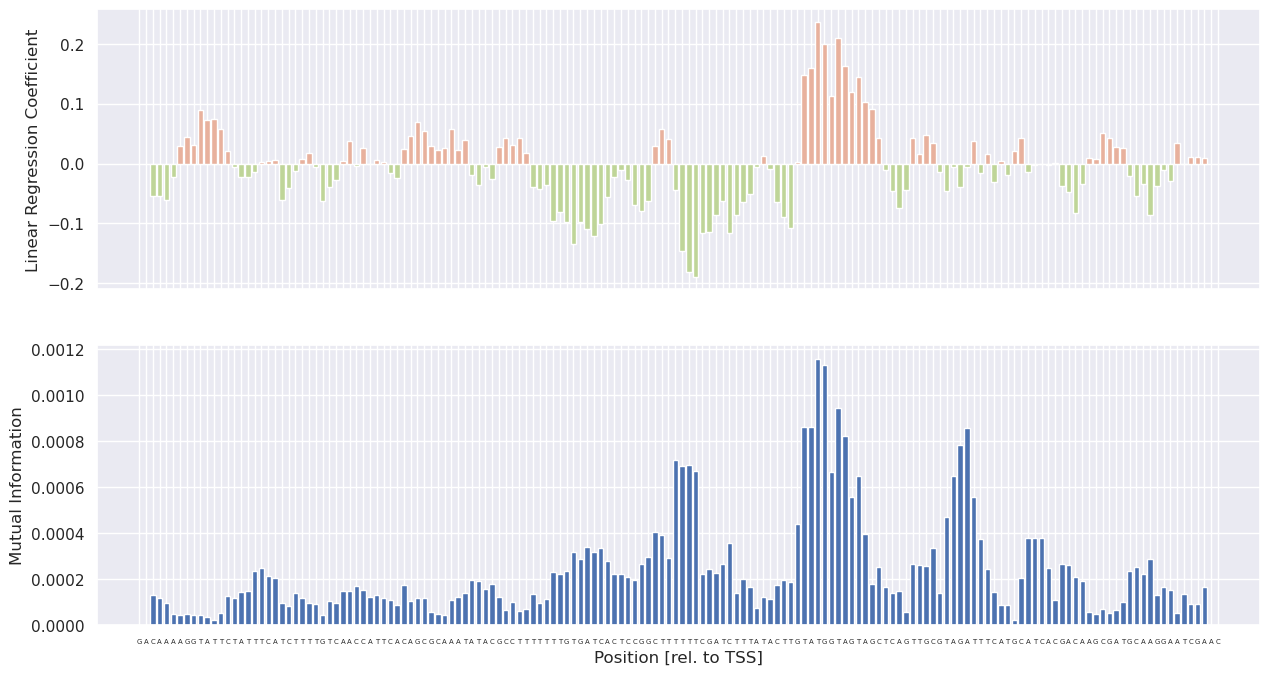

In [218]:
make_footprints(df_new_LB, d_lin=2, d_MI=2)[0]

TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG


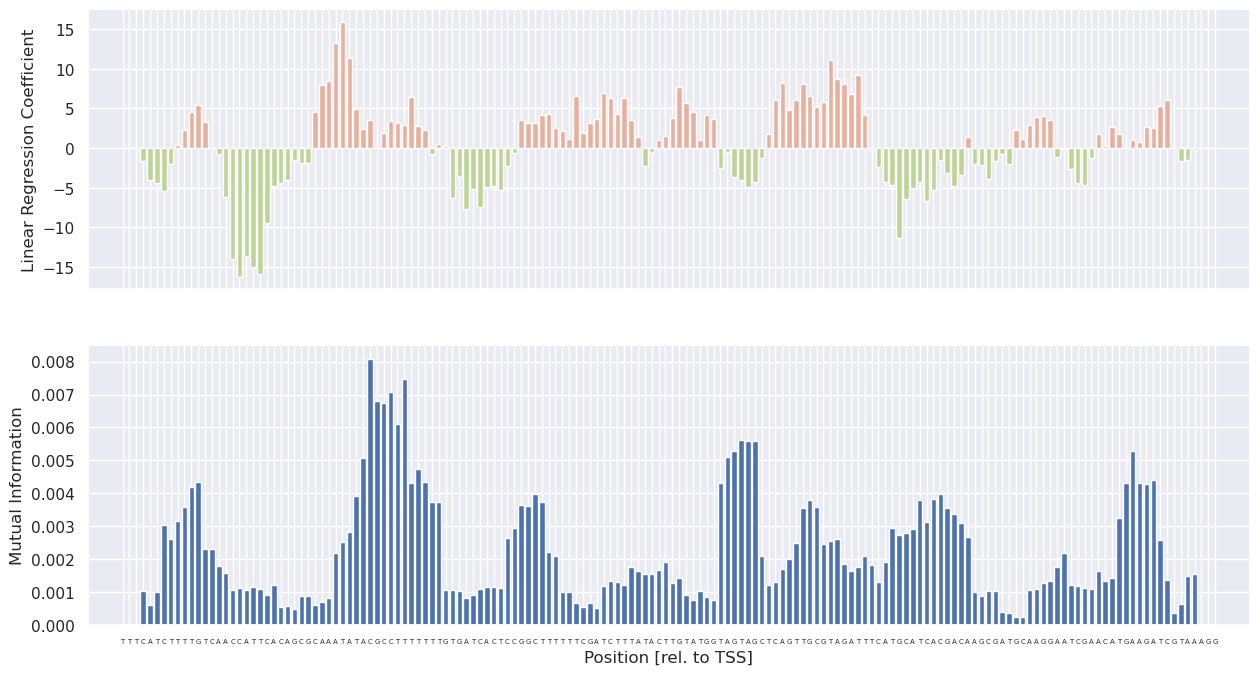

In [221]:
fig, ax = make_footprints(df_LB_tom, d_lin=3, d_MI=3)
fig

TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG


/tmp/ipykernel_7386/3662177005.py:10: RuntimeWarning: divide by zero encountered in log2
  I[i] = np.sum([p[m, mu, i] * np.log2(p[m, mu, i] / p_m[m] / p_mu[mu]) for mu in [0, 1] for m in [0, 1]])
/tmp/ipykernel_7386/3662177005.py:10: RuntimeWarning: invalid value encountered in double_scalars
  I[i] = np.sum([p[m, mu, i] * np.log2(p[m, mu, i] / p_m[m] / p_mu[mu]) for mu in [0, 1] for m in [0, 1]])


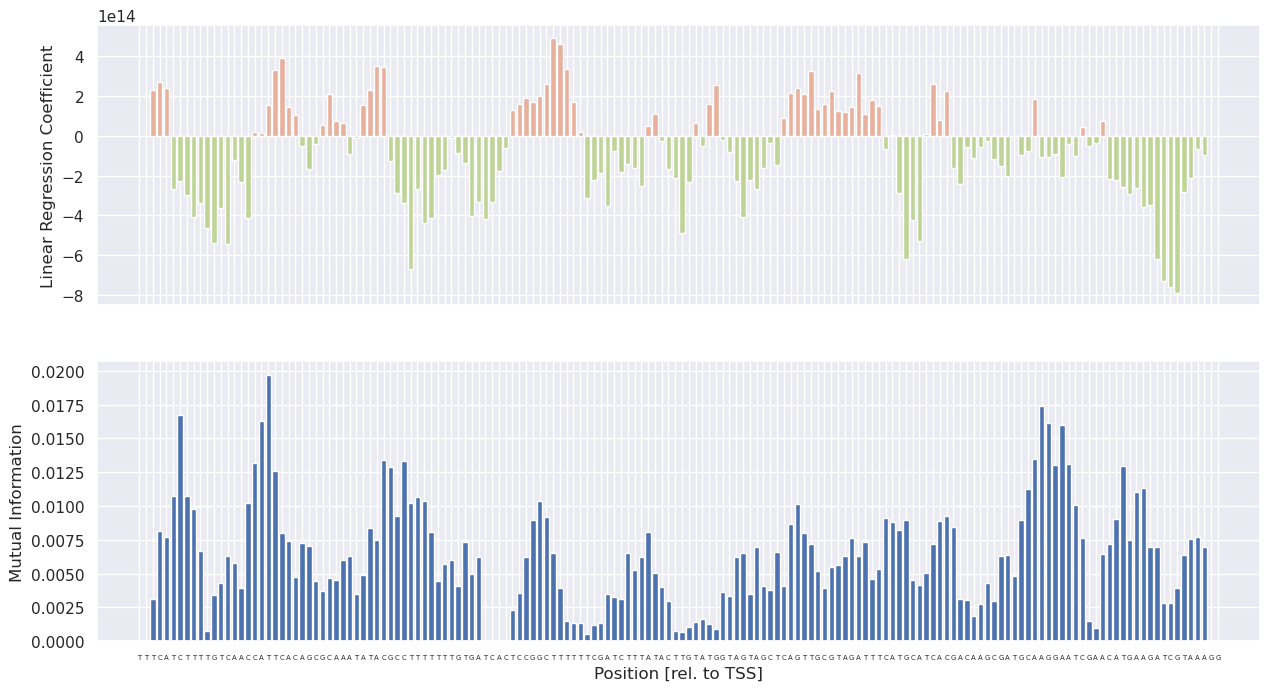

In [240]:
make_footprints(df_LB_con_g, d_lin=2, d_MI=2)[0]

TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG


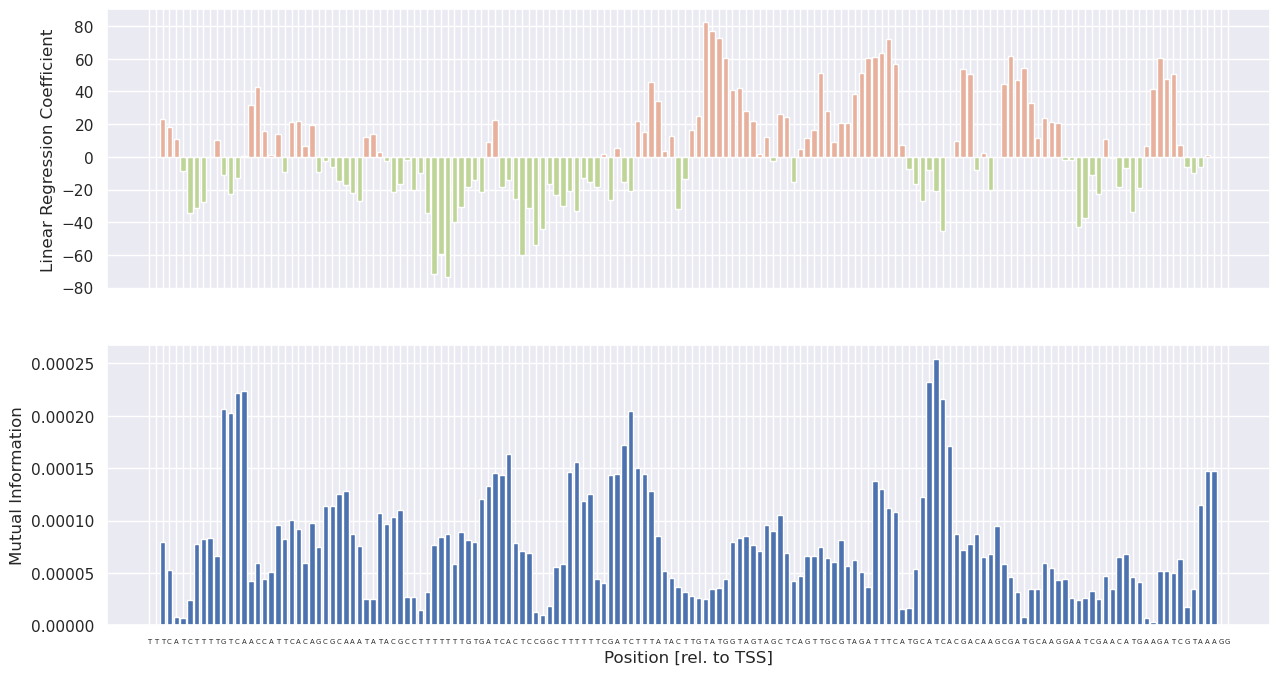

In [241]:
make_footprints(df_LB_con_p, d_lin=2, d_MI=2)[0]

In [251]:
df = pd.read_csv("../../../data/LB_barcodes.csv")
np.unique(df.name)

array(['TSS_1414_storz_regulondb', 'TSS_18061_regulondb',
       'TSS_4654_wanner_regulondb', 'TSS_4655_regulondb',
       'TSS_6311_regulondb', 'aceBp', 'acrAp', 'acrBp', 'acrZp', 'araBp',
       'araCp', 'blrp', 'cpxRp2', 'crpp1', 'crpp2', 'crpp3', 'cusCp',
       'dgoRp', 'dicCp', 'dinQp', 'ecnBp', 'elaBp', 'fldAp', 'ftsKp1',
       'ftsKp2', 'furpa', 'furpb', 'galEp', 'galEp1', 'galEp2', 'galEp3',
       'galSp', 'gatYp', 'gatZp', 'ghoSp', 'gyrAp', 'hdeAp2',
       'hyuA_predicted', 'icdC_predicted', 'ihfAp4',
       'intE_xisE_ymfH_predicted', 'kbpp4', 'lacIp', 'ldrDp', 'lpp',
       'lppp2', 'marRp', 'mcbAp5', 'mglBp', 'mhpRp1', 'mhpRp2', 'mprAp',
       'mtnp', 'ompFp', 'ompRp1', 'ompRp2', 'ompRp3', 'ompRp4', 'pheMp',
       'ratA_yfjF_predicted', 'rcsBp1', 'rcsBp2', 'rcsDp', 'rdlDp',
       'recNp', 'relBp', 'rspAp', 'sohAp', 'ssnAp', 'sulAp',
       'tabA_predicted', 'tfaE_stfE_predicted', 'tisBp', 'tmaR_predicted',
       'tnaCp', 'tolCp1', 'tolCp2', 'tolCp3', 'tolCp4', 'uacT

240


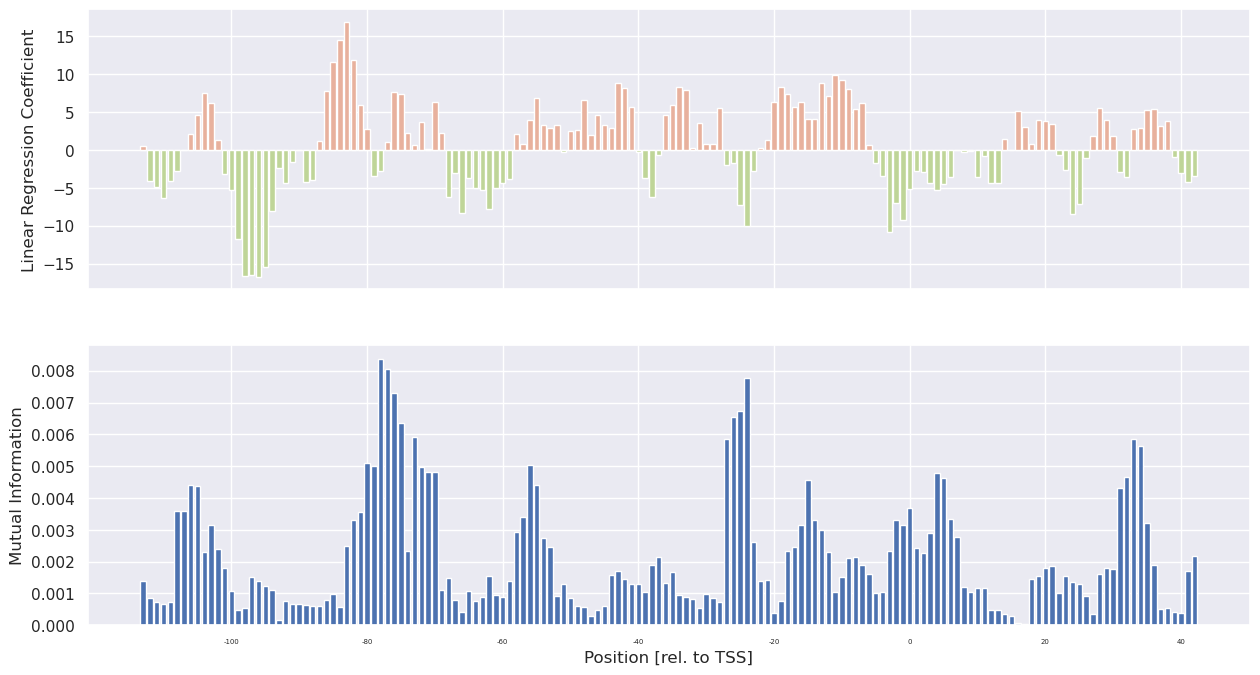

In [276]:
df = pd.read_csv("../../../data/LB_barcodes.csv")
df = df.loc[df.name == "rspAp", :]
df.rename(columns={"promoter": "seq"}, inplace=True)

df = df.loc[df.counts < 1000, :]
df = df.loc[df.ct_1/df.ct > 0.05, :]

print(len(df))

fig, ax = make_footprints(df, d_lin=2, d_MI=2)
ax[1].set_xticks([-100, -80, -60, -40, -20, 0, 20, 40], [-100, -80, -60, -40, -20, 0, 20, 40])
fig